# Part I: Find predictors of influence

Each observation describes two individuals, A and B. There are 11 variables for each person based on Twitter activity, e.g., number of followers, retweets, network
characteristics, etc. Each observation shows whether A > B (Choice = “1”) or B > A (Choice = “0”).

Using the training data set (train.csv), create an analytic model for pairs of individuals to classify who is more influential
- Check if you should use all variables
- Perhaps a transformation of (A / B) or (A – B) variables will be better than using A and B variables separately. This may also be easier to interpret
- Report the confusion matrix of your “best” model

Dataset: https://www.kaggle.com/competitions/predict-who-is-more-influential-in-a-social-network/overview

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

font = {'family' : 'Optima',
        'weight' : 'regular',
        'size'   : 16}
plt.rc('font', **font)
plt.rc('xtick', labelsize=15)     # tick labels bigger
plt.rc('ytick', labelsize=15)     # tick labels bigger
plt.rc('savefig', dpi=300)       # higher res outputs

## Load dataset into the DataFrame

In [42]:
df = pd.read_csv('train.csv')

### Check the types

In [43]:
df.dtypes

Choice                   int64
A_follower_count         int64
A_following_count        int64
A_listed_count           int64
A_mentions_received    float64
A_retweets_received    float64
A_mentions_sent        float64
A_retweets_sent        float64
A_posts                float64
A_network_feature_1      int64
A_network_feature_2    float64
A_network_feature_3    float64
B_follower_count         int64
B_following_count        int64
B_listed_count           int64
B_mentions_received    float64
B_retweets_received    float64
B_mentions_sent        float64
B_retweets_sent        float64
B_posts                float64
B_network_feature_1      int64
B_network_feature_2    float64
B_network_feature_3    float64
dtype: object

### Check the dimensions

In [44]:
df.shape

(5500, 23)

### Check the column names

In [45]:
df.columns

Index(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3'],
      dtype='object')

## Data Exploration

### Provide descriptive statistics

In [46]:
df.describe()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,A_network_feature_3,B_follower_count,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
count,5500.000000,5.500000e+03,5.500000e+03,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5.500000e+03,5500.000000,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,0.509455,6.498840e+05,1.265895e+04,5952.453273,2.666032e+03,1032.371839,6.011873,1.109924,9.090730,5267.768000,84.805209,3747.219758,6.854869e+05,12738.259818,5903.148364,2.554598e+03,997.149954,6.099658,1.106236,9.505821,5254.933636,85.024196,3745.175480
std,0.499956,2.028787e+06,4.900867e+04,17339.141191,2.916543e+04,10954.953223,9.519797,1.910104,18.311060,28946.777345,104.073204,5757.339852,2.160612e+06,50054.520874,16298.462018,2.508873e+04,9342.006880,9.729557,1.939914,19.424680,26778.820125,106.689384,5518.399590
min,0.000000,1.600000e+01,0.000000e+00,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,0.000000,0.000000,2.000000e+01,0.000000,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,0.000000,0.000000
25%,0.000000,2.663750e+03,3.220000e+02,85.000000,3.453649e+00,0.716816,0.359534,0.100503,0.632440,12.000000,14.991870,1180.805341,2.498250e+03,322.000000,75.000000,3.260473e+00,0.714556,0.356943,0.100503,0.822584,11.000000,15.176568,1206.500000
50%,1.000000,4.558900e+04,7.780000e+02,932.000000,4.876542e+01,14.029113,2.299666,0.341936,3.555194,195.000000,54.925234,2206.420734,4.402700e+04,773.000000,890.000000,4.876542e+01,14.029113,2.251398,0.341936,3.342999,190.000000,54.925234,2206.420734
75%,1.000000,3.927380e+05,2.838000e+03,6734.000000,3.498196e+02,118.704407,7.198330,1.320681,10.691878,1323.000000,109.695652,4390.379310,3.701142e+05,2838.000000,6734.000000,3.743699e+02,107.081021,6.866840,1.320681,10.600502,1323.000000,112.191489,4349.908608
max,1.000000,3.654319e+07,1.165830e+06,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,1121.000000,144651.461538,3.654319e+07,664324.000000,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,1861.583333,75526.083333


### Check missing values

In [47]:
def missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    print("Dataframe has " + str(df.shape[1]) + " columns.")
    print("There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    return mis_val_table_ren_columns

In [48]:
# Missing values statistics
miss_values = missing_values(df)
miss_values.head(20)

Dataframe has 23 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


### Data duplicates

In [49]:
df.duplicated().sum()

132

In [50]:
df = df.drop_duplicates()
df.shape

(5368, 23)

In [51]:
# Count the number of zeroes in each column
(df == 0).sum()

Choice                 2632
A_follower_count          0
A_following_count        34
A_listed_count           59
A_mentions_received       0
A_retweets_received       0
A_mentions_sent           0
A_retweets_sent           0
A_posts                   0
A_network_feature_1     203
A_network_feature_2     332
A_network_feature_3     251
B_follower_count          0
B_following_count        32
B_listed_count           45
B_mentions_received       0
B_retweets_received       0
B_mentions_sent           0
B_retweets_sent           0
B_posts                   0
B_network_feature_1     190
B_network_feature_2     331
B_network_feature_3     240
dtype: int64

### Histograms

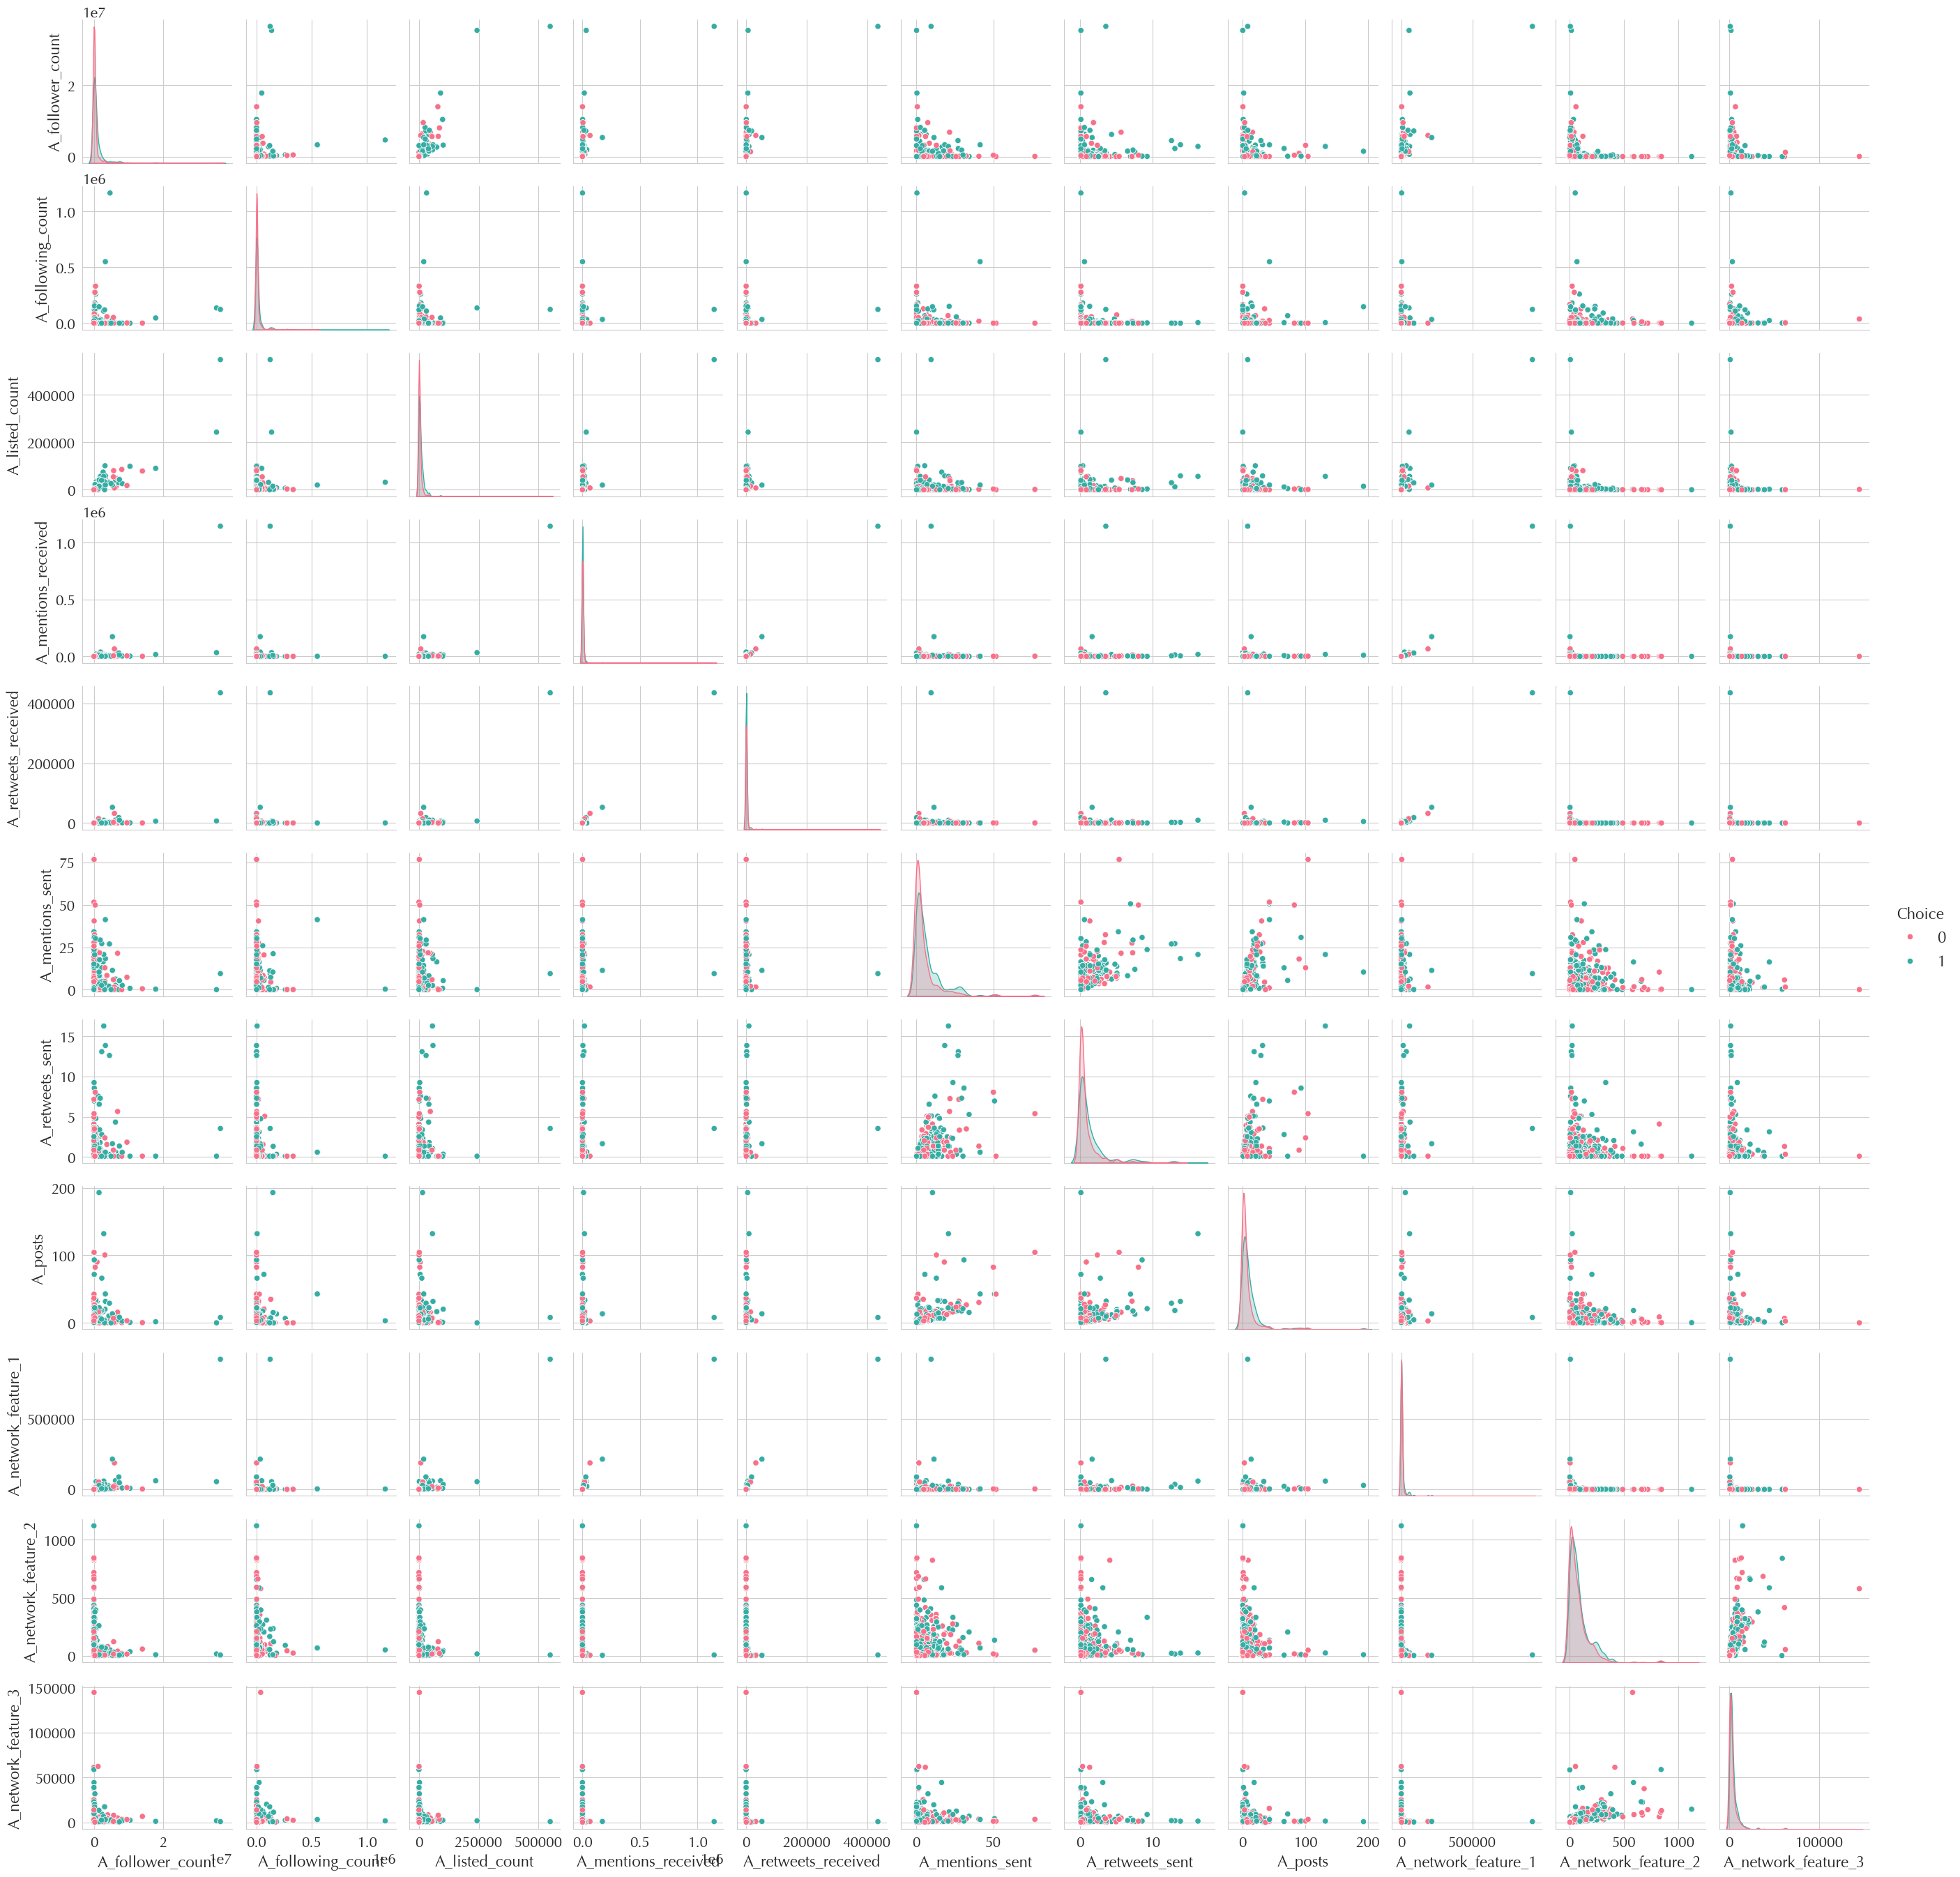

In [52]:
# Plot pair plot
sns.pairplot(df.iloc[:,:12], hue="Choice", palette="husl")

## Target

### Check distinct values in choice

In [53]:
df['Choice'].unique()

array([0, 1])

## Transformation of features
<span style="background-color: lightgreen;">Using changes (like A minus B) or comparisons (like A divided by B) can give us better insights than just looking at A and B on their own. After checking how both methods work, we decided to go with A minus B. This is because when we divide A by B, we can end up with a lot of infinite values in cases where B is zero. So, subtracting is a more trustworthy way to analyze our data.</span>


### A - B

In [54]:
a_b_following_count = df['A_follower_count'] - df['B_follower_count']
a_b_listed_count = df['A_listed_count'] - df['B_listed_count']
a_b_mentions_received = df['A_mentions_received'] - df['B_mentions_received']
a_b_retweets_received = df['A_retweets_received'] - df['B_retweets_received']
a_b_mentions_sent = df['A_mentions_sent'] - df['B_mentions_sent']
a_b_retweets_sent = df['A_retweets_sent'] - df['B_retweets_sent']
a_b_posts = df['A_posts'] - df['B_posts']
a_b_network_feature_1 = df['A_network_feature_1'] - df['B_network_feature_1']
a_b_network_feature_2 = df['A_network_feature_2'] - df['B_network_feature_2']
a_b_network_feature_3 = df['A_network_feature_3'] - df['B_network_feature_3']

### Correlations

In [55]:
minus_features = {
    'choice': df['Choice'],
    'a_b_following_count': a_b_following_count, 
    'a_b_listed_count': a_b_listed_count, 
    'a_b_mentions_received': a_b_mentions_received,
    'a_b_retweets_received': a_b_retweets_received, 
    'a_b_mentions_sent': a_b_mentions_sent, 
    'a_b_retweets_sent': a_b_retweets_sent, 
    'a_b_posts': a_b_posts,
    'a_b_network_feature_1': a_b_network_feature_1, 
    'a_b_network_feature_2': a_b_network_feature_2, 
    'a_b_network_feature_3': a_b_network_feature_3
}

# Convert dictionary to DataFrame
minus_df = pd.DataFrame(minus_features)

# Calculate correlations
minus_corr = minus_df.corr()

In [56]:
# Print minus_df
minus_df.head()

,choice,a_b_following_count,a_b_listed_count,a_b_mentions_received,a_b_retweets_received,a_b_mentions_sent,a_b_retweets_sent,a_b_posts,a_b_network_feature_1,a_b_network_feature_2,a_b_network_feature_3
0,0,-34235,-1686,-14.846518,-3.883525,-8.103828,-0.231920,-6.626665,-64,90.969697,9438.106061
1,0,-17671,-1382,49.961485,16.854685,2.481652,0.546816,4.106299,206,-113.587704,-1601.149290
2,0,3688,-105,24.768949,9.201969,4.758317,0.490702,2.986516,92,58.594502,5722.563574
3,0,-19542,-276,-565.184032,-390.016375,-26.220532,-7.067053,-29.271279,-1756,-21.469296,-1299.678967
4,1,38035,2460,127.252413,33.417223,21.117111,2.213765,19.298035,466,78.904293,840.220036


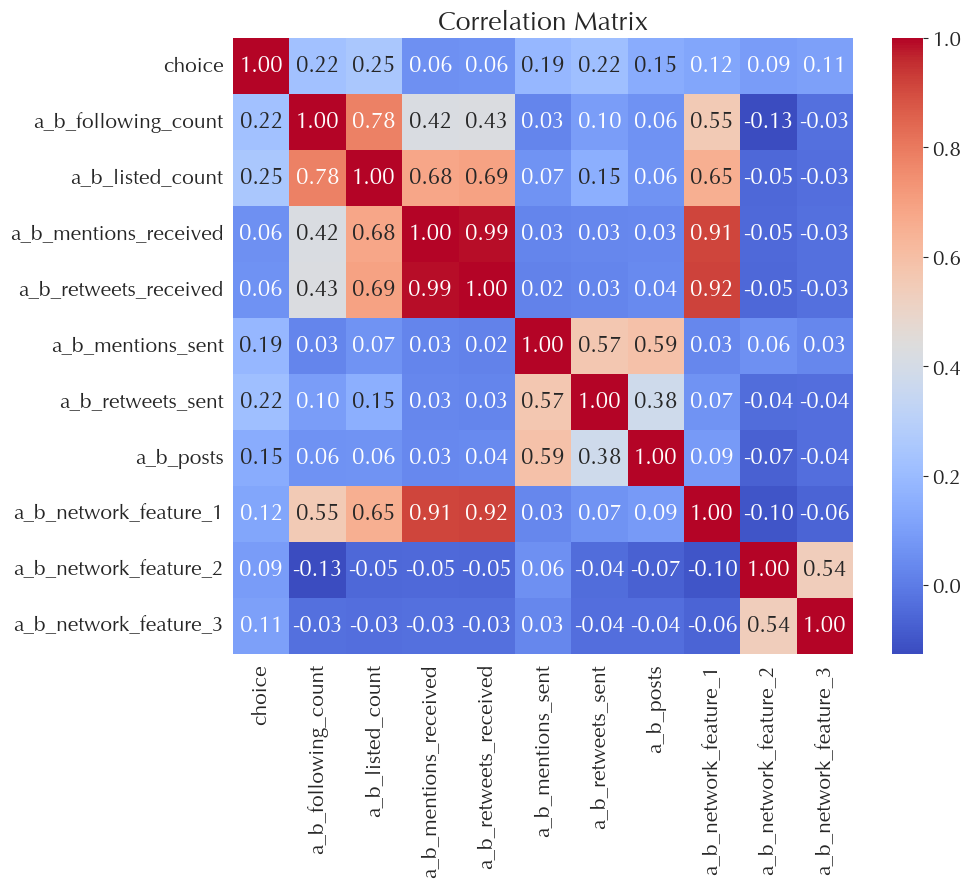

In [57]:
# Print correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(minus_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

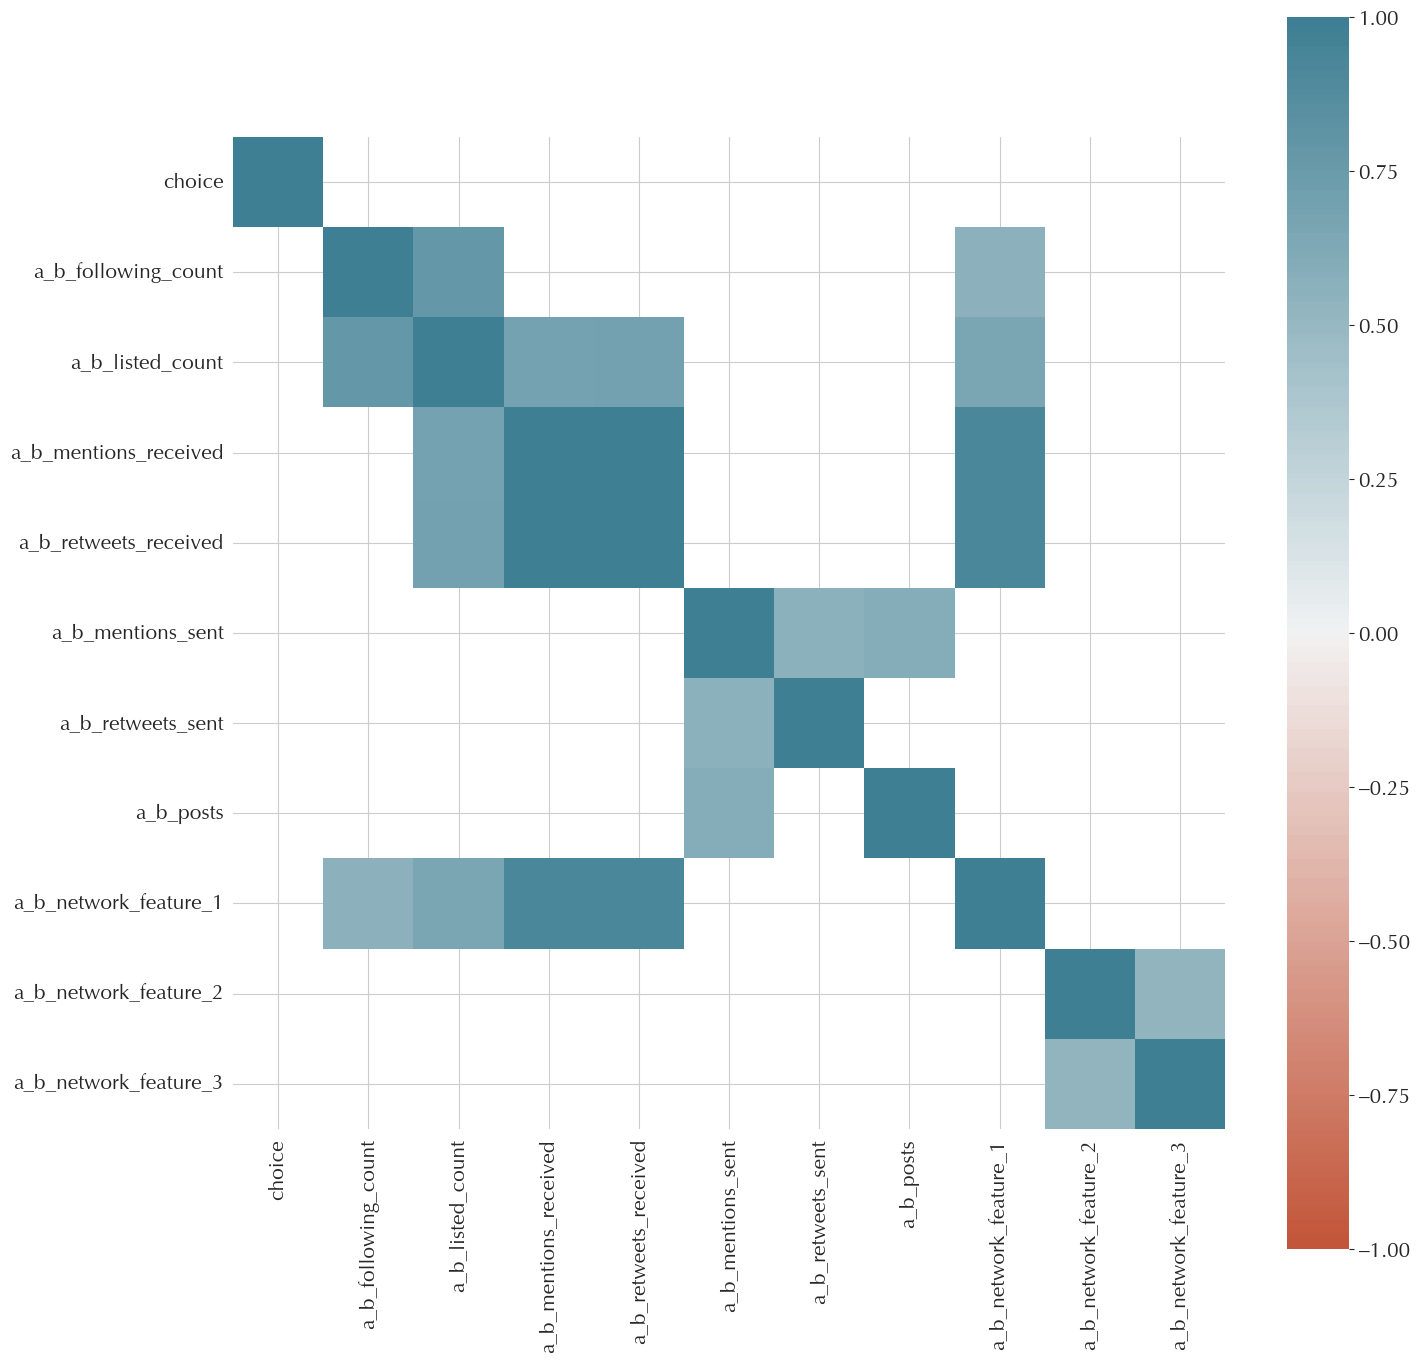

In [58]:
high_corr_minus = minus_corr[abs(minus_corr) > 0.5]
plt.figure(figsize=(16, 16))
ax = sns.heatmap(
    high_corr_minus,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [59]:
# Print the highly correlated pairs
high_corr_minus = high_corr_minus.unstack().sort_values()
high_corr_minus = high_corr_minus[high_corr_minus != 1]
high_corr_minus = high_corr_minus[abs(high_corr_minus) > 0.5]
print(high_corr_minus)

a_b_network_feature_2  a_b_network_feature_3    0.535223
a_b_network_feature_3  a_b_network_feature_2    0.535223
a_b_network_feature_1  a_b_following_count      0.554175
a_b_following_count    a_b_network_feature_1    0.554175
a_b_mentions_sent      a_b_retweets_sent        0.568475
a_b_retweets_sent      a_b_mentions_sent        0.568475
a_b_mentions_sent      a_b_posts                0.589821
a_b_posts              a_b_mentions_sent        0.589821
a_b_listed_count       a_b_network_feature_1    0.654962
a_b_network_feature_1  a_b_listed_count         0.654962
a_b_mentions_received  a_b_listed_count         0.681169
a_b_listed_count       a_b_mentions_received    0.681169
a_b_retweets_received  a_b_listed_count         0.694710
a_b_listed_count       a_b_retweets_received    0.694710
                       a_b_following_count      0.781722
a_b_following_count    a_b_listed_count         0.781722
a_b_mentions_received  a_b_network_feature_1    0.914955
a_b_network_feature_1  a_b_ment

In [60]:
# Keep only unique pairs
unique_high_corr_minus = high_corr_minus[::2]
print(unique_high_corr_minus)

a_b_network_feature_2  a_b_network_feature_3    0.535223
a_b_network_feature_1  a_b_following_count      0.554175
a_b_mentions_sent      a_b_retweets_sent        0.568475
                       a_b_posts                0.589821
a_b_listed_count       a_b_network_feature_1    0.654962
a_b_mentions_received  a_b_listed_count         0.681169
a_b_retweets_received  a_b_listed_count         0.694710
a_b_listed_count       a_b_following_count      0.781722
a_b_mentions_received  a_b_network_feature_1    0.914955
a_b_retweets_received  a_b_network_feature_1    0.920833
                       a_b_mentions_received    0.988450
dtype: float64


### VIF

In [61]:
def calculate_vif(data):
    # Handling or removing infinite values
    data = data.replace([np.inf, -np.inf], np.nan)
    
    # Dropping columns or rows with NaN values (choose one approach)
    # Approach 1: Drop any rows with NaN values
    # clean_data = data.dropna()
    
    # Approach 2: Fill NaN values with the mean (or median, zero, etc.)
    clean_data = data.fillna(data.mean())
    
    # Ensure we only process numeric data
    numeric_data = clean_data.select_dtypes(include=[np.number])
    
    # Initialize DataFrame to store VIF scores
    vif_data = pd.DataFrame()
    vif_data["feature"] = numeric_data.columns
    
    # Calculate VIF for each numeric feature
    vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i)
                       for i in range(len(numeric_data.columns))]
    return vif_data

In [62]:
vif_scores_minus = calculate_vif(minus_df)
print(vif_scores_minus)

                  feature        VIF
0                  choice   1.094283
1     a_b_following_count   4.738793
2        a_b_listed_count   6.263977
3   a_b_mentions_received  44.420409
4   a_b_retweets_received  54.503221
5       a_b_mentions_sent   2.022893
6       a_b_retweets_sent   1.598379
7               a_b_posts   1.598470
8   a_b_network_feature_1  11.639764
9   a_b_network_feature_2   1.469200
10  a_b_network_feature_3   1.424834


<span style="background-color: lightblue;">High VIF values suggest that the model's predictive power and interpretability could be compromised by multicollinearity. VIF scores for a_b_mentions_received, a_b_retweets_received and a_b_network_feature_1 indicate that these are highly linearly related to one or more of the other variables in the model. </span>

<span style="background-color: lightblue;">We will proceed by removing a_b_mentions_received and re-testing the VIF. </span>

In [63]:
# Remove a_b_mentions_received, a_b_listed_count
minus_df_test1 = minus_df.drop(columns=['a_b_mentions_received', 'a_b_network_feature_1'])

# Recalculate VIF scores
vif_scores_minus_test1 = calculate_vif(minus_df_test1)

# Print VIF scores
print(vif_scores_minus_test1)

                 feature       VIF
0                 choice  1.073159
1    a_b_following_count  2.847457
2       a_b_listed_count  4.625383
3  a_b_retweets_received  2.137255
4      a_b_mentions_sent  1.999932
5      a_b_retweets_sent  1.557887
6              a_b_posts  1.569215
7  a_b_network_feature_2  1.468922
8  a_b_network_feature_3  1.414247


In [64]:
# Remove a_b_retweets_received, a_b_network_feature_1
minus_df_test2 = minus_df.drop(columns=['a_b_retweets_received', 'a_b_network_feature_1'])

# Recalculate VIF scores
vif_scores_minus_test2 = calculate_vif(minus_df_test2)

# Print VIF scores
print(vif_scores_minus_test2)

                 feature       VIF
0                 choice  1.073015
1    a_b_following_count  2.823951
2       a_b_listed_count  4.446352
3  a_b_mentions_received  2.039863
4      a_b_mentions_sent  2.001191
5      a_b_retweets_sent  1.554465
6              a_b_posts  1.567824
7  a_b_network_feature_2  1.468439
8  a_b_network_feature_3  1.414149


In [65]:
minus_df.head()

,choice,a_b_following_count,a_b_listed_count,a_b_mentions_received,a_b_retweets_received,a_b_mentions_sent,a_b_retweets_sent,a_b_posts,a_b_network_feature_1,a_b_network_feature_2,a_b_network_feature_3
0,0,-34235,-1686,-14.846518,-3.883525,-8.103828,-0.231920,-6.626665,-64,90.969697,9438.106061
1,0,-17671,-1382,49.961485,16.854685,2.481652,0.546816,4.106299,206,-113.587704,-1601.149290
2,0,3688,-105,24.768949,9.201969,4.758317,0.490702,2.986516,92,58.594502,5722.563574
3,0,-19542,-276,-565.184032,-390.016375,-26.220532,-7.067053,-29.271279,-1756,-21.469296,-1299.678967
4,1,38035,2460,127.252413,33.417223,21.117111,2.213765,19.298035,466,78.904293,840.220036


<span style="background-color: lightblue;">Decision to drop 'a_b_mentions_received', 'a_b_network_feature_1' </span>

In [66]:
minus_df.drop(columns=['a_b_retweets_received', 'a_b_network_feature_1'], inplace=True)
minus_df.head()

,choice,a_b_following_count,a_b_listed_count,a_b_mentions_received,a_b_mentions_sent,a_b_retweets_sent,a_b_posts,a_b_network_feature_2,a_b_network_feature_3
0,0,-34235,-1686,-14.846518,-8.103828,-0.231920,-6.626665,90.969697,9438.106061
1,0,-17671,-1382,49.961485,2.481652,0.546816,4.106299,-113.587704,-1601.149290
2,0,3688,-105,24.768949,4.758317,0.490702,2.986516,58.594502,5722.563574
3,0,-19542,-276,-565.184032,-26.220532,-7.067053,-29.271279,-21.469296,-1299.678967
4,1,38035,2460,127.252413,21.117111,2.213765,19.298035,78.904293,840.220036


### Identifying Infinite Values

In [67]:
# Check for infinite values in the dataset
infinite_values = np.isinf(minus_df).any()
print("Columns with infinite values:", infinite_values[infinite_values].index.tolist())

Columns with infinite values: []


### Handling Infinite Values

In [68]:
# Replace infinite values with NaN
minus_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Then, you might want to impute these NaNs, for example, with the mean of the columns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

X_imputed = imputer.fit_transform(minus_df)

# Print the first 5 rows of X_imputed
print(X_imputed[:5])

[[ 0.00000000e+00 -3.42350000e+04 -1.68600000e+03 -1.48465182e+01
  -8.10382784e+00 -2.31919685e-01 -6.62666489e+00  9.09696970e+01
   9.43810606e+03]
 [ 0.00000000e+00 -1.76710000e+04 -1.38200000e+03  4.99614851e+01
   2.48165175e+00  5.46816093e-01  4.10629932e+00 -1.13587704e+02
  -1.60114929e+03]
 [ 0.00000000e+00  3.68800000e+03 -1.05000000e+02  2.47689489e+01
   4.75831697e+00  4.90702248e-01  2.98651610e+00  5.85945017e+01
   5.72256357e+03]
 [ 0.00000000e+00 -1.95420000e+04 -2.76000000e+02 -5.65184032e+02
  -2.62205324e+01 -7.06705339e+00 -2.92712794e+01 -2.14692958e+01
  -1.29967897e+03]
 [ 1.00000000e+00  3.80350000e+04  2.46000000e+03  1.27252413e+02
   2.11171109e+01  2.21376511e+00  1.92980354e+01  7.89042934e+01
   8.40220036e+02]]


### Converting the NumPy array back into a pandas DataFrame

In [69]:
# Convert the imputed NumPy array back into a pandas DataFrame
minus_df_imputed = pd.DataFrame(X_imputed, columns=minus_df.columns)

# Print the first 5 rows of the newly created DataFrame
minus_df_imputed.head()

,choice,a_b_following_count,a_b_listed_count,a_b_mentions_received,a_b_mentions_sent,a_b_retweets_sent,a_b_posts,a_b_network_feature_2,a_b_network_feature_3
0,0.0,-34235.0,-1686.0,-14.846518,-8.103828,-0.231920,-6.626665,90.969697,9438.106061
1,0.0,-17671.0,-1382.0,49.961485,2.481652,0.546816,4.106299,-113.587704,-1601.149290
2,0.0,3688.0,-105.0,24.768949,4.758317,0.490702,2.986516,58.594502,5722.563574
3,0.0,-19542.0,-276.0,-565.184032,-26.220532,-7.067053,-29.271279,-21.469296,-1299.678967
4,1.0,38035.0,2460.0,127.252413,21.117111,2.213765,19.298035,78.904293,840.220036


In [70]:
y = np.asarray(minus_df_imputed['choice'])
X = minus_df_imputed.drop(['choice'],axis=1)

In [71]:
from sklearn.model_selection import train_test_split

# First split: Separate out a test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [72]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)
scaler.fit(X_test)

# Transform both the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

<span style="background-color: lightblue;">We tested multiple models including Logistic Regression, K-NN, Random Forest, and Gradient Boosting. Based on model performance (accuracy), Gradient Boosting and Random Forest stood out with 78.1% and 76.6% accuracy. We conclude that the best model is **Gradient Boosting with 78.1% accuracy**. </span>

| Model Name           | Accuracy Score |
|----------------------|----------------|
| Logistic Regression  | 73.6%          |
| K-NN                 | 70.7%          |
| Random Forest        | 76.6%          |
| Gradient Boosting    | 78.1%          |

### Logistic Regression

Accuracy: 73.6%


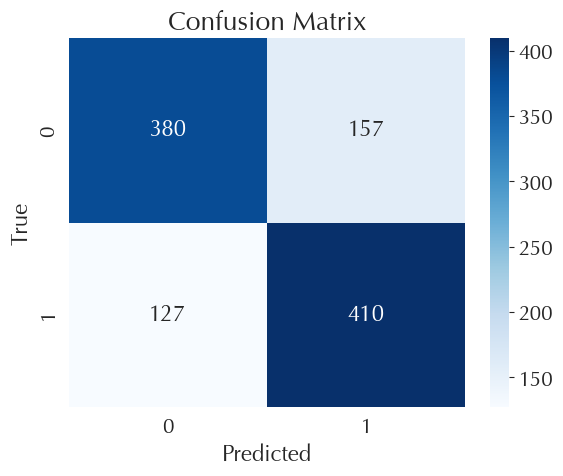

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73       537
         1.0       0.72      0.76      0.74       537

    accuracy                           0.74      1074
   macro avg       0.74      0.74      0.74      1074
weighted avg       0.74      0.74      0.74      1074



In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model
lr = LogisticRegression()

# Fit the model on the training data
lr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test_scaled)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred)
conf_matrix_lr = confusion_matrix(y_test, y_pred)
class_report_lr = classification_report(y_test, y_pred)

# Printing accuracy
print(f"Accuracy: {accuracy_lr*100:.1f}%")

# Plotting the confusion matrix
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Printing classification report
print("Classification Report:")
print(class_report_lr)

#### Feature Importance

In [74]:
feature_names = minus_df.drop(['choice'], axis=1).columns.tolist()

# Coefficients of the model
coefficients = lr.coef_[0]
feature_importance = pd.Series(coefficients, index=feature_names)

# Sorting the features by their absolute values in descending order
sorted_features = feature_importance.abs().sort_values(ascending=False)

# Print the sorted features
print("Features in descending order of importance:")
print(sorted_features)

Features in descending order of importance:
a_b_listed_count         1.549646
a_b_retweets_sent        0.315299
a_b_network_feature_2    0.200098
a_b_network_feature_3    0.174795
a_b_mentions_received    0.154838
a_b_mentions_sent        0.153510
a_b_following_count      0.093070
a_b_posts                0.024167
dtype: float64


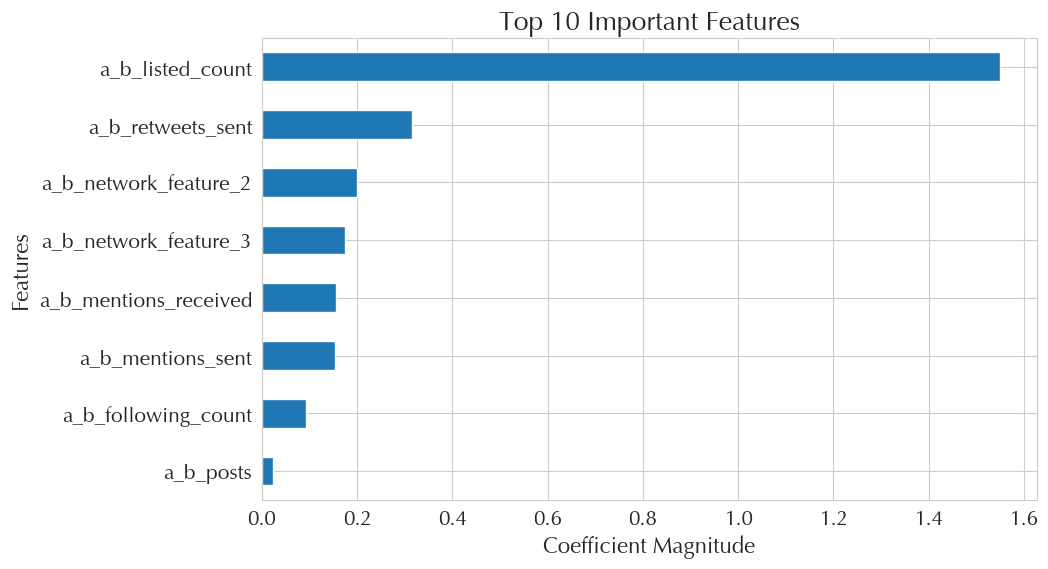

In [75]:
# Sorting the features by their absolute values in ascending order for the purpose of the horizontal bar plot
# This ensures the most important features are at the top of the plot
sorted_features_for_plotting = sorted_features.head(10).sort_values(ascending=True)

# Plotting the most important features
plt.figure(figsize=(10, 6))
sorted_features_for_plotting.plot(kind='barh')
plt.title('Top 10 Important Features')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.show()

### K-NN

Accuracy: 70.7%


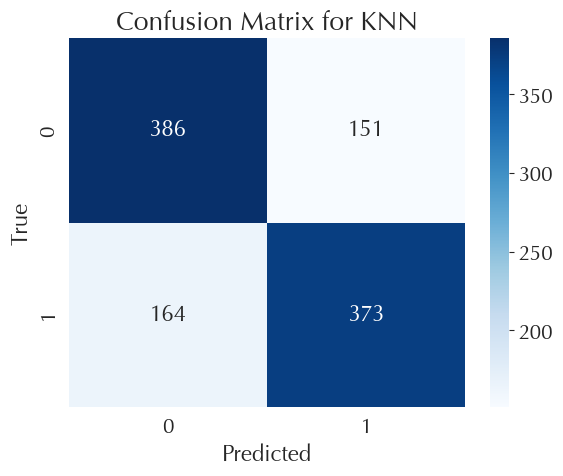

Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.72      0.71       537
         1.0       0.71      0.69      0.70       537

    accuracy                           0.71      1074
   macro avg       0.71      0.71      0.71      1074
weighted avg       0.71      0.71      0.71      1074



In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Initialize the KNN model. You can adjust 'n_neighbors' as needed.
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn.fit(X_train_scaled, y_train)

# Make sure to use the scaled version of X_test here
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred)
conf_matrix_knn = confusion_matrix(y_test, y_pred)
class_report_knn = classification_report(y_test, y_pred)

# Printing accuracy
print(f"Accuracy: {accuracy_knn*100:.1f}%")

# Plotting the confusion matrix
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Printing classification report
print("Classification Report:")
print(class_report_knn)

#### Feature Importance

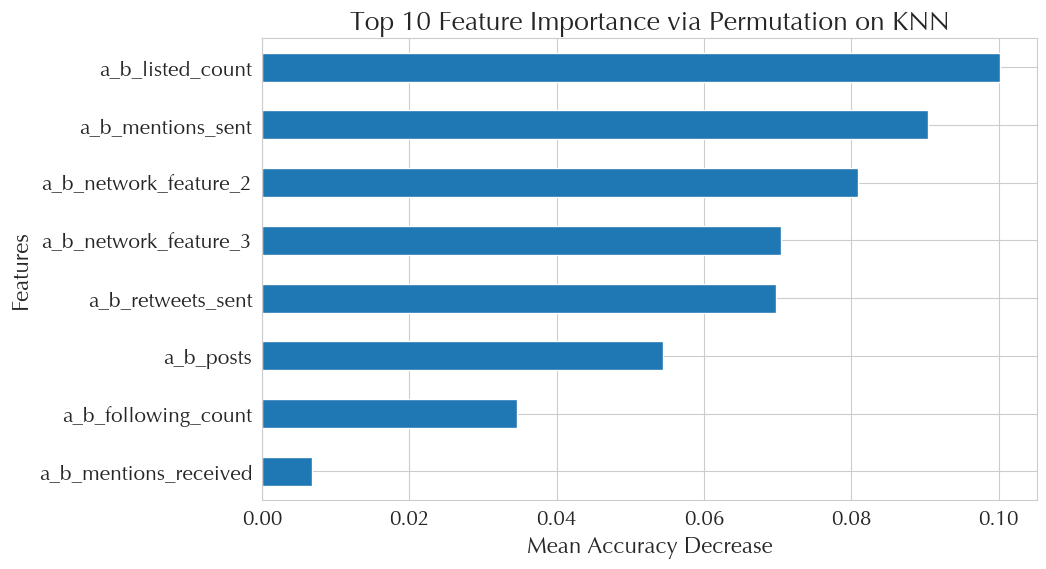

Sorted Feature Importance:
a_b_listed_count         0.100186
a_b_mentions_sent        0.090435
a_b_network_feature_2    0.080870
a_b_network_feature_3    0.070497
a_b_retweets_sent        0.069752
a_b_posts                0.054472
a_b_following_count      0.034596
a_b_mentions_received    0.006832
dtype: float64


In [77]:
from sklearn.inspection import permutation_importance
# Perform permutation importance on the fitted model
results = permutation_importance(knn, X_train_scaled, y_train, scoring='accuracy')

# Get the importance scores
importance_scores = results.importances_mean

# Map these scores with feature names
feature_names = X_train.columns
feature_importance_knn = pd.Series(importance_scores, index=feature_names)

# Sort the features by their importance scores
sorted_importance_knn = feature_importance_knn.sort_values(ascending=False)

# Plotting the sorted feature importance
plt.figure(figsize=(10, 6))
sorted_importance_knn.head(10).plot(kind='barh')
plt.title('Top 10 Feature Importance via Permutation on KNN')
plt.xlabel('Mean Accuracy Decrease')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

# Print the sorted feature importance
print("Sorted Feature Importance:")
print(sorted_importance_knn)

### Random Forest

Accuracy: 76.6%


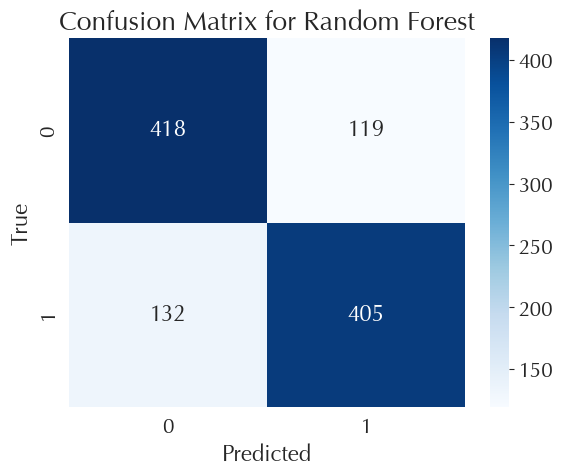

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.78      0.77       537
         1.0       0.77      0.75      0.76       537

    accuracy                           0.77      1074
   macro avg       0.77      0.77      0.77      1074
weighted avg       0.77      0.77      0.77      1074



In [78]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model. You can adjust parameters as needed, like 'n_estimators'.
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train_scaled, y_train)

# Make sure to use the scaled version of X_test here. Correcting the oversight in your previous KNN example.
y_pred = rf.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)
conf_matrix_rf = confusion_matrix(y_test, y_pred)
class_report_rf = classification_report(y_test, y_pred)

# Printing accuracy
print(f"Accuracy: {accuracy_rf*100:.1f}%")

# Plotting the confusion matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Printing classification report
print("Classification Report:")
print(class_report_rf)

#### Feature Importance

In [79]:
feature_names = minus_df.drop(['choice'], axis=1).columns.tolist()

# Accessing feature importances from the Random Forest model
importances = rf.feature_importances_

# Mapping importances to feature names
feature_importance_rf = pd.Series(importances, index=feature_names)

# Sorting the features by their importance values in descending order
sorted_features_rf = feature_importance_rf.sort_values(ascending=False)

# Print the sorted features
print("Features in descending order of importance for Random Forest:")
print(sorted_features_rf)

# Sorting the features by their importance values in ascending order for the purpose of the horizontal bar plot
# This ensures the most important features are at the top of the plot
sorted_features_for_plotting_rf = sorted_features_rf.head(10).sort_values(ascending=True)

Features in descending order of importance for Random Forest:
a_b_listed_count         0.213524
a_b_following_count      0.173004
a_b_mentions_received    0.164113
a_b_posts                0.095005
a_b_mentions_sent        0.092983
a_b_network_feature_3    0.092340
a_b_network_feature_2    0.087898
a_b_retweets_sent        0.081134
dtype: float64


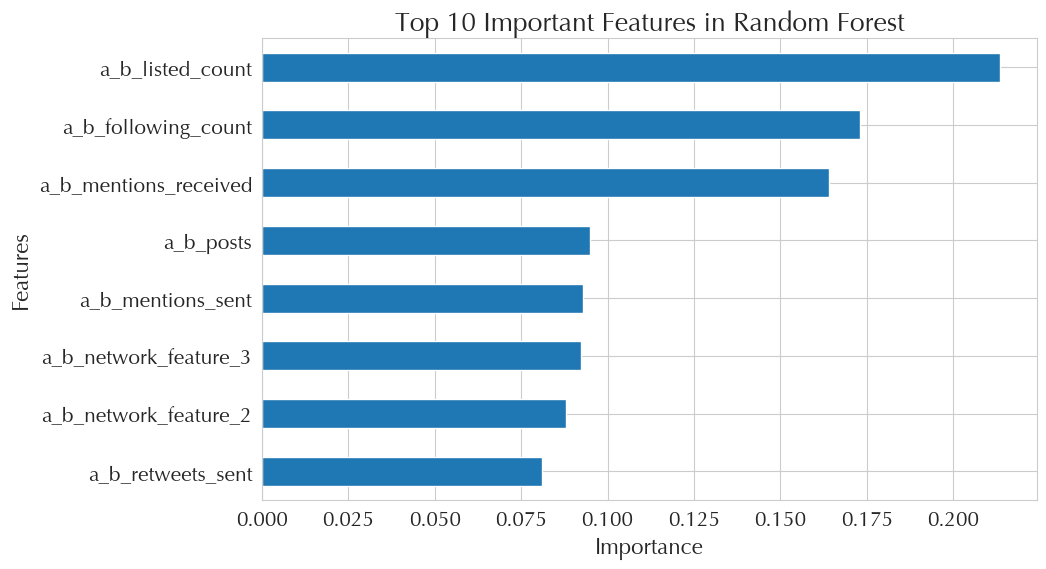

In [80]:
# Plotting the most important features
plt.figure(figsize=(10, 6))
sorted_features_for_plotting_rf.plot(kind='barh')
plt.title('Top 10 Important Features in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

### Gradient Boosting

Accuracy: 78.1%


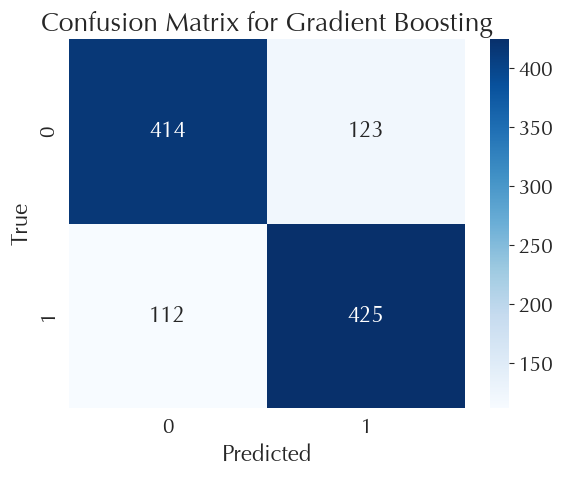

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78       537
         1.0       0.78      0.79      0.78       537

    accuracy                           0.78      1074
   macro avg       0.78      0.78      0.78      1074
weighted avg       0.78      0.78      0.78      1074



In [81]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model on the training data
gb.fit(X_train_scaled, y_train)

# Make predictions on the test set using the scaled version
y_pred = gb.predict(X_test_scaled)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred)
recall_gb = recall_score(y_test, y_pred)
conf_matrix_gb = confusion_matrix(y_test, y_pred)
class_report_gb = classification_report(y_test, y_pred)

# Printing accuracy
print(f"Accuracy: {accuracy_gb*100:.1f}%")

# Plotting the confusion matrix
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Printing classification report
print("Classification Report:")
print(class_report_gb)

#### Feature Importance

Features in descending order of importance for Gradient Boosting:
a_b_listed_count         0.465695
a_b_following_count      0.188159
a_b_mentions_received    0.136276
a_b_network_feature_2    0.062676
a_b_retweets_sent        0.046089
a_b_mentions_sent        0.038598
a_b_posts                0.035100
a_b_network_feature_3    0.027407
dtype: float64


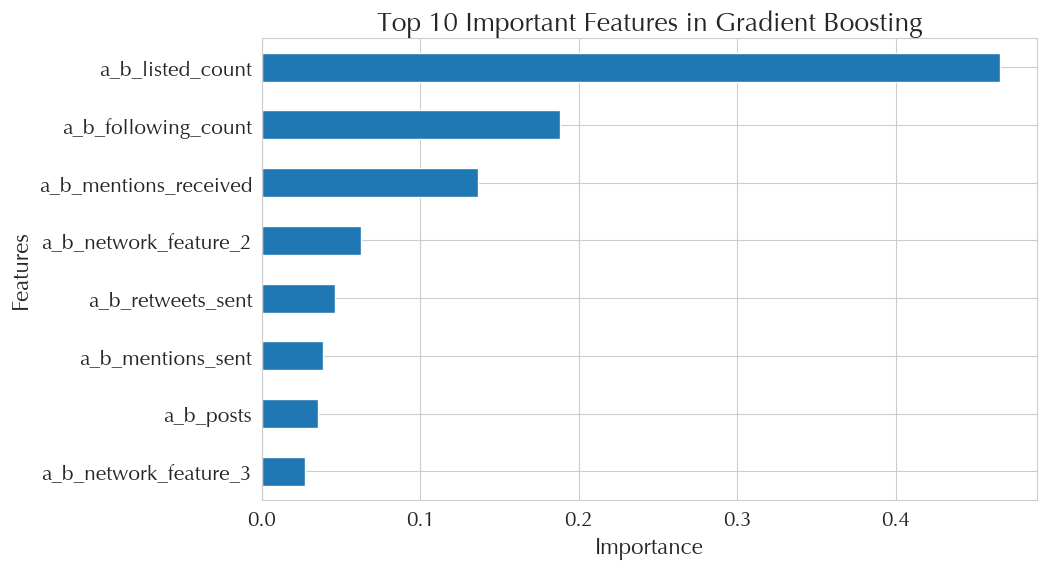

In [82]:
feature_names = minus_df.drop(['choice'], axis=1).columns.tolist()

# Accessing feature importances from the Gradient Boosting model
importances_gb = gb.feature_importances_

# Mapping importances to feature names
feature_importance_gb = pd.Series(importances_gb, index=feature_names)

# Sorting the features by their importance values in descending order
sorted_features_gb = feature_importance_gb.sort_values(ascending=False)

# Print the sorted features
print("Features in descending order of importance for Gradient Boosting:")
print(sorted_features_gb)

# Sorting the features by their importance values in ascending order for the purpose of the horizontal bar plot
# This ensures the most important features are at the top of the plot
sorted_features_for_plotting_gb = sorted_features_gb.head(10).sort_values(ascending=True)

# Plotting the most important features
plt.figure(figsize=(10, 6))
sorted_features_for_plotting_gb.plot(kind='barh')
plt.title('Top 10 Important Features in Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

### Calculate the financial value
A retailer wants influencers to tweet its promotion for a product. If a non-influencer tweets, there is no benefit to the retailer. If an influencer tweets once, there is a 0.02% chance that his/her followers will buy one unit of a product. Assume the retailer has a profit margin of $10 per unit, and that one customer can buy only one unit. If an influencer tweets twice, the overall buying probability will be 0.03%. Without analytics, the retailer offers $5 to each person (A and B) to tweet once. With analytics, the retailer offers $10 to those identified as influencers by the model to send two tweets each. If the model classifies an individual as a non-influencer, s/he is not selected/paid by the retailer to tweet.

In [83]:
df = pd.read_csv('train.csv')
FinancialImpact = df.copy()

In [84]:
# Constants
profit_per_unit = 10 # Profit for each unit sold
cost_per_tweet_without_analytics = 5 # Cost without analytics per person for one tweet
cost_per_tweet_with_analytics = 10  # Cost with analytics per influencer for two tweets
purchase_prob_single_tweet = 0.0002 # Probability of buying with one tweet
purchase_prob_double_tweet = 0.0003 # Probability of buying with two tweets
model_accuracy = accuracy_gb # Accuracy of best model
model_recall = recall_gb # Recall of best model

In [85]:
# Calculate the number of influencers and their average followers
influencer = FinancialImpact.shape[0]
noninfluencer = FinancialImpact.shape[0]

In [86]:
influencer

5500

In [87]:
noninfluencer

5500

In [88]:
# Calculate the average number of followers for influencers and non-influencers

influencer_followers = (FinancialImpact.loc[FinancialImpact['Choice'] == 1, 'A_follower_count'].sum() +\
                FinancialImpact.loc[FinancialImpact['Choice'] == 0, 'B_follower_count'].sum())

noninfluencer_followers = (FinancialImpact.loc[FinancialImpact['Choice'] == 0, 'A_follower_count'].sum() +\
                FinancialImpact.loc[FinancialImpact['Choice'] == 1, 'B_follower_count'].sum())

In [89]:
influencer_followers

5376568593

In [90]:
noninfluencer_followers

1967970867

#### Without model

In [91]:
# Calculate the cost, revenue, and profit with the model
Cost_without_model = cost_per_tweet_without_analytics * (influencer + noninfluencer)

# Since non-influencers do not lead to sales, the revenue is only from influencers
Revenue_without_model = profit_per_unit * purchase_prob_single_tweet * influencer_followers

Profit_without_model = Revenue_without_model - Cost_without_model
print("Total Cost without model: $", Cost_without_model)
print("Total Revenue without model: $", Revenue_without_model)
print("Total Profit without model: $", Profit_without_model)

Total Cost without model: $ 55000
Total Revenue without model: $ 10753137.186
Total Profit without model: $ 10698137.186


#### With model

Since our model does not have 100% accuracy, we need to take model accuracy and recall into consideration when calculating financial impact.

In [93]:
# Calculate the cost, revenue, and profit with the model

# The cost will not be impacted by the model accuracy as we do not know which one is a false positive
Cost_with_model = cost_per_tweet_with_analytics * (influencer) 

# Since non-influencers and false positives do not lead to sales, the revenue is only from recall of influencers
Revenue_with_model = model_recall * profit_per_unit * purchase_prob_double_tweet * influencer_followers

Profit_with_model = Revenue_with_model - Cost_with_model
print("Total Cost with model: $", Cost_with_model)
print("Total Revenue with model: $", Revenue_with_model)
print("Total Profit with model: $", Profit_with_model)

Total Cost with model: $ 55000
Total Revenue with model: $ 12765595.821368715
Total Profit with model: $ 12710595.821368715


#### Boost in profit with model

In [94]:
Profit_boost = Profit_with_model - Profit_without_model
print("Profit Boost: $", Profit_boost)

Profit Boost: $ 2012458.635368714


#### Perfect Model

In [95]:
# Calculate the cost, revenue, and profit with the model

# The cost will not be impacted by the model accuracy as we do not know which one is a false positive
Cost_withperfect_model = cost_per_tweet_with_analytics * (influencer) 

# Since non-influencers and false positives do not lead to sales, the revenue is only from recall of influencers
Revenue_withperfect_model = profit_per_unit * purchase_prob_double_tweet * influencer_followers

Profit_withperfect_model = Revenue_withperfect_model - Cost_withperfect_model
print("Total Cost with perfect model: $", Cost_withperfect_model)
print("Total Revenue with perfect model: $", Revenue_withperfect_model)
print("Total Profit with perfect model: $", Profit_withperfect_model)

Total Cost with perfect model: $ 55000
Total Revenue with perfect model: $ 16129705.778999997
Total Profit with perfect model: $ 16074705.778999997


In [96]:
Profit_perfectboost = Profit_withperfect_model - Profit_without_model
print("Profit Boost: $", Profit_perfectboost)

Profit Boost: $ 5376568.592999997
